In [1]:
#Import Packages:

import pandas as pd
import os

from pyspark.sql import SparkSession
import numpy as np

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

import pyspark
from pyspark.ml import feature, regression, Pipeline
from pyspark.sql import functions as fn, Row
from pyspark import sql

import matplotlib.pyplot as plt
import pandas as pd

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

from datetime import datetime
from pyspark.sql.functions import col,udf
from pyspark.sql.types import DateType
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
import matplotlib.pyplot as plt


In [2]:
#Reading Holiday data(US Federal) for year 2015
raw_weather_holiday_merged = pd.read_excel("/Users/apsharma/IST718 Dropbox/IST718Project_Data/Weather Data/2015_weather_holiday_merged.xlsx")
raw_weather_holiday_merged["pickup_date"] = pd.to_datetime(raw_weather_holiday_merged['pickup_date'], format="%d.%m.%y", errors='coerce')
raw_weather_holiday_merged.head()

,pickup_date,avg_temp_C,Rain,Fog,Snow,Holiday
0,2015-01-01,1,0,0,0,1
1,2015-01-02,4,0,0,0,0
2,2015-01-03,3,1,0,1,0
3,2015-01-04,9,1,0,0,0
4,2015-01-05,2,0,0,0,0


In [3]:
raw_weather_holiday_merged = spark.createDataFrame(raw_weather_holiday_merged)
raw_weather_holiday_merged = raw_weather_holiday_merged.withColumn("date_only", fn.to_date(fn.col("pickup_date")))
raw_weather_holiday_merged.show()

+-------------------+----------+----+---+----+-------+----------+
|        pickup_date|avg_temp_C|Rain|Fog|Snow|Holiday| date_only|
+-------------------+----------+----+---+----+-------+----------+
|2015-01-01 00:00:00|         1|   0|  0|   0|      1|2015-01-01|
|2015-01-02 00:00:00|         4|   0|  0|   0|      0|2015-01-02|
|2015-01-03 00:00:00|         3|   1|  0|   1|      0|2015-01-03|
|2015-01-04 00:00:00|         9|   1|  0|   0|      0|2015-01-04|
|2015-01-05 00:00:00|         2|   0|  0|   0|      0|2015-01-05|
|2015-01-06 00:00:00|        -6|   0|  0|   1|      0|2015-01-06|
|2015-01-07 00:00:00|        -9|   0|  0|   0|      0|2015-01-07|
|2015-01-08 00:00:00|        -9|   0|  0|   0|      0|2015-01-08|
|2015-01-09 00:00:00|        -3|   0|  0|   1|      0|2015-01-09|
|2015-01-10 00:00:00|        -7|   0|  0|   0|      0|2015-01-10|
|2015-01-11 00:00:00|        -2|   0|  0|   0|      0|2015-01-11|
|2015-01-12 00:00:00|         3|   1|  0|   0|      0|2015-01-12|
|2015-01-1

In [4]:
#Reading weather data for NYC in year 2015 
weather_holiday_data_clean = raw_weather_holiday_merged

In [5]:
# Reading 12 months of NYC's Yellow Taxi Data for year 2015 
raw_Jan_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST718Project_Data/Taxi Data/2015-01_100k.csv")
raw_Feb_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST718Project_Data/Taxi Data/2015-02_100k.csv")
raw_Mar_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST718Project_Data/Taxi Data/2015-03_100k.csv")
raw_Apr_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST718Project_Data/Taxi Data/2015-04_100k.csv")
raw_May_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST718Project_Data/Taxi Data/2015-05_100k.csv")
raw_Jun_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST718Project_Data/Taxi Data/2015-06_100k.csv")
raw_Jul_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST718Project_Data/Taxi Data/2015-07_100k.csv")
raw_Aug_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST718Project_Data/Taxi Data/2015-08_100k.csv")
raw_Sep_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST718Project_Data/Taxi Data/2015-09_100k.csv")
raw_Oct_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST718Project_Data/Taxi Data/2015-10_100k.csv")
raw_Nov_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST718Project_Data/Taxi Data/2015-11_100k.csv")
raw_Dec_Data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/IST718Project_Data/Taxi Data/2015-12_100k.csv")


In [6]:
frames = [raw_Jan_Data1,raw_Feb_Data1,raw_Mar_Data1,raw_Apr_Data1,raw_May_Data1,raw_Jun_Data1,raw_Jul_Data1,
          raw_Aug_Data1,raw_Sep_Data1,raw_Oct_Data1,raw_Nov_Data1,raw_Dec_Data1]

In [7]:
# Merging the 3 different datasets
Full_DataPD = pd.concat(frames)

In [8]:
Full_DataPD1=Full_DataPD

In [9]:
#Taking sample out of 12 Million datapoints:
Full_DataPDSample= Full_DataPD.sample(60000)

In [10]:
Full_DataPDSample1=Full_DataPDSample

In [11]:
type(Full_DataPDSample1)

pandas.core.frame.DataFrame

In [12]:
#Removing unnecessary columns:
Full_DataPDSample2 = Full_DataPDSample1.drop(["pickup_borough","dropoff_borough","fare_amount","extra","mta_tax","tip_amount","tolls_amount","improvement_surcharge","dropoff_zip","pickup_zip"],axis =1)

In [13]:
Full_DataPDSample_Spark = spark.createDataFrame(Full_DataPDSample2)

In [14]:
Full_DataPDSample_Spark1= Full_DataPDSample_Spark

In [15]:
Full_DataPDSample_Spark1 = Full_DataPDSample_Spark1.withColumn("date_only", fn.to_date(fn.col("pickup_datetime")))
Full_DataPDSample_Spark1.limit(20).show(2)

+--------+-------------------+-------------------+---------------+-------------+------------------+-----------------+----------+------------------+------------------+-----------------+------------+------------+-------------------+--------------------+----------+
|VendorID|    pickup_datetime|   dropoff_datetime|passenger_count|trip_distance|  pickup_longitude|  pickup_latitude|RateCodeID|store_and_fwd_flag| dropoff_longitude| dropoff_latitude|payment_type|total_amount|pickup_neighborhood|dropoff_neighborhood| date_only|
+--------+-------------------+-------------------+---------------+-------------+------------------+-----------------+----------+------------------+------------------+-----------------+------------+------------+-------------------+--------------------+----------+
|       1|2015-11-14 22:35:02|2015-11-14 22:43:37|              2|          0.8|-73.98409271240234|40.76068115234375|         1|                 N|-73.97766876220702|40.75379180908203|           2|         8.3|C

In [16]:
Merged_FULL_data = weather_holiday_data_clean.join(Full_DataPDSample_Spark1, ['date_only'], how='full') #execute this when needed

In [17]:
Merged_FULL_data1 = Merged_FULL_data

In [18]:
Merged_FULL_data2 = Merged_FULL_data1

In [19]:
#Writing Full Merged Data:
#Merged_FULL_data2.toPandas().to_csv(header=True, path_or_buf='/Users/apsharma/IST718 Dropbox/IST718Project_Data/FullMergedData_Dec6.csv')

In [20]:
#Data Cleaning
# from pyspark.sql.functions import isnan, when, count, col
# Merged_FULL_data2.select([count(when(isnan(c), c)).alias(c) for c in Merged_FULL_data2.columns]).show()

In [21]:
#Read_Merged_Data2 = Read_Merged_Data2.drop("Unnamed: 0")

In [22]:
#Read_Merged_Data2.printSchema()

In [23]:
len(Merged_FULL_data2.columns)

22

In [24]:
Merged_FULL_data2Pandas = Merged_FULL_data2.toPandas()

In [25]:
Merged_FULL_dataPandas1 = Merged_FULL_data2Pandas

In [26]:
Merged_FULL_dataPandas2= Merged_FULL_dataPandas1

In [27]:
#Dummy variables creation:----------------

In [28]:
dummy_df = Merged_FULL_data2.drop("date_only") 
len(dummy_df.columns)

21

In [29]:
dummy_df = dummy_df.drop("pickup_date") 
len(dummy_df.columns) 

20

In [30]:
from pyspark.sql.types import TimestampType
dummy_df = dummy_df.withColumn("pickup_datetime", dummy_df['pickup_datetime'].cast(TimestampType()))
dummy_df = dummy_df.withColumn("dropoff_datetime", dummy_df['dropoff_datetime'].cast(TimestampType()))
#dummy_df.printSchema()

In [31]:
# Dummy for Rate code: base is 99
dummy_df= dummy_df.select(fn.when(fn.col('RateCodeID')=='1',1).otherwise(0).alias('RateCode_stdrate'), 
                           fn.when(fn.col('RateCodeID')=='2',1).otherwise(0).alias('RateCode_JFK'),
                           fn.when(fn.col('RateCodeID')=='3',1).otherwise(0).alias('RateCode_Newark'), 
                           fn.when(fn.col('RateCodeID')=='4',1).otherwise(0).alias('RateCode_Nassau_W'),
                           fn.when(fn.col('RateCodeID')=='5',1).otherwise(0).alias('RateCode_Negotiated'), 
                           fn.when(fn.col('RateCodeID')=='6',1).otherwise(0).alias('RateCode_Group'),
                         '*')
dummy_df=dummy_df.drop('RateCodeID')

In [32]:
#base is unknown #5
dummy_df = dummy_df.select('*',fn.when(fn.col('payment_type') == '1',1).otherwise(0).alias('ptype_CCard'),
                           fn.when(fn.col('payment_type') == '2',1).otherwise(0).alias('ptype_cash'),
                           fn.when(fn.col('payment_type') == '3',1).otherwise(0).alias('ptype_nocharge'),
                           fn.when(fn.col('payment_type') == '4',1).otherwise(0).alias('ptype_dispute'),
                           fn.when(fn.col('payment_type') == '6',1).otherwise(0).alias('ptype_voidtrip'))
dummy_df = dummy_df.drop('payment_type')

In [33]:
len(dummy_df.columns)

29

In [34]:
#Dummy for flag : base is No
dummy_df= dummy_df.select(fn.when(fn.col('store_and_fwd_flag')=='Y',1).otherwise(0).alias('store_and_fwd_flag_1_0'),'*')
dummy_df = dummy_df.drop('store_and_fwd_flag')

In [35]:
len(dummy_df.columns)

29

In [36]:
#Dummy creation for Vendor ID: base is 2
dummy_df= dummy_df.select(fn.when(fn.col('VendorID')=='1',1).otherwise(0).alias('VendorID_1_0'),'*')
dummy_df=dummy_df.drop('VendorID')

In [37]:
from pyspark.sql import functions as F
timeFmt = "yyyy-MM-dd'T'HH:mm:ss.SSS"
timeDiff = (F.unix_timestamp(dummy_df.dropoff_datetime, format=timeFmt)
            - F.unix_timestamp(dummy_df.pickup_datetime, format=timeFmt))
#dummy_df = dummy_df.wfrom pyspark.sql import functions as F
timeFmt = "yyyy-MM-dd'T'HH:mm:ss.SSS"
timeDiff = (F.unix_timestamp(dummy_df.dropoff_datetime, format=timeFmt)
            - F.unix_timestamp(dummy_df.pickup_datetime, format=timeFmt))
dummy_df = dummy_df.withColumn("Duration", timeDiff)

In [38]:
dummy_df1= dummy_df.toPandas()

In [39]:
dummy_df1['day_of_week'] = dummy_df1['pickup_datetime'].dt.dayofweek

In [40]:
dummy_df1['pickup_hour'] = dummy_df1.pickup_datetime.apply(lambda x: x.hour)

In [41]:
dummy_df1['month'] = pd.DatetimeIndex(dummy_df1['pickup_datetime']).month

In [42]:
len(dummy_df1.columns)

33

In [43]:
#Convert to Spark again

In [44]:
dummy_df1_Spark = spark.createDataFrame(dummy_df1)

In [45]:
dummy_df3Spark= dummy_df1_Spark

In [46]:
#Conversion from long into int
dummy_df3Spark.printSchema()

root
 |-- VendorID_1_0: long (nullable = true)
 |-- store_and_fwd_flag_1_0: long (nullable = true)
 |-- RateCode_stdrate: long (nullable = true)
 |-- RateCode_JFK: long (nullable = true)
 |-- RateCode_Newark: long (nullable = true)
 |-- RateCode_Nassau_W: long (nullable = true)
 |-- RateCode_Negotiated: long (nullable = true)
 |-- RateCode_Group: long (nullable = true)
 |-- avg_temp_C: long (nullable = true)
 |-- Rain: long (nullable = true)
 |-- Fog: long (nullable = true)
 |-- Snow: long (nullable = true)
 |-- Holiday: long (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- pickup_neighborhoo

In [47]:
dummy_df3Spark = dummy_df3Spark.withColumn('Duration', fn.col('Duration').cast('int'))
dummy_df3Spark = dummy_df3Spark.withColumn('avg_temp_C', fn.col('Duration').cast('int'))
dummy_df3Spark = dummy_df3Spark.withColumn('passenger_count', fn.col('Duration').cast('int'))

In [48]:
dummy_df3Spark.printSchema()

root
 |-- VendorID_1_0: long (nullable = true)
 |-- store_and_fwd_flag_1_0: long (nullable = true)
 |-- RateCode_stdrate: long (nullable = true)
 |-- RateCode_JFK: long (nullable = true)
 |-- RateCode_Newark: long (nullable = true)
 |-- RateCode_Nassau_W: long (nullable = true)
 |-- RateCode_Negotiated: long (nullable = true)
 |-- RateCode_Group: long (nullable = true)
 |-- avg_temp_C: integer (nullable = true)
 |-- Rain: long (nullable = true)
 |-- Fog: long (nullable = true)
 |-- Snow: long (nullable = true)
 |-- Holiday: long (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- pickup_neigh

In [49]:
len(dummy_df3Spark.columns)

33

In [50]:
#Remove Zipcodes's
dummy_df_clean = dummy_df3Spark
dummy_df_clean = dummy_df_clean.drop('dropoff_zip','pickup_zip')

In [51]:
dummy_df_clean.printSchema()

root
 |-- VendorID_1_0: long (nullable = true)
 |-- store_and_fwd_flag_1_0: long (nullable = true)
 |-- RateCode_stdrate: long (nullable = true)
 |-- RateCode_JFK: long (nullable = true)
 |-- RateCode_Newark: long (nullable = true)
 |-- RateCode_Nassau_W: long (nullable = true)
 |-- RateCode_Negotiated: long (nullable = true)
 |-- RateCode_Group: long (nullable = true)
 |-- avg_temp_C: integer (nullable = true)
 |-- Rain: long (nullable = true)
 |-- Fog: long (nullable = true)
 |-- Snow: long (nullable = true)
 |-- Holiday: long (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- pickup_neigh

In [52]:
#Distinct neighborhoods in 'pickup_neighborhood' column
distinct_neighborhoods = [i.pickup_neighborhood for i in dummy_df_clean.select('pickup_neighborhood').distinct().collect()]
print (distinct_neighborhoods)

['Northeast Bronx', 'Lower Manhattan', 'Southeast Queens', 'Upper East Side', 'Central Brooklyn', 'Gramercy Park and Murray Hill', 'West Central Queens', 'Central Bronx', 'East Harlem', 'Southwest Queens', 'Lower East Side', 'Bushwick and Williamsburg', 'Bronx Park and Fordham', 'Sunset Park', 'Chelsea and Clinton', 'Hunts Point and Mott Haven', 'High Bridge and Morrisania', 'Upper West Side', 'Northeast Queens', 'Canarsie and Flatlands', 'East New York and New Lots', 'West Queens', 'Northwest Queens', 'Central Queens', 'Jamaica', 'Southwest Brooklyn', 'Borough Park', 'Central Harlem', 'Southeast Bronx', 'Southern Brooklyn', 'Flatbush', 'Greenwich Village and Soho', 'Northwest Brooklyn', 'North Queens', 'Stapleton and St. George', 'Inwood and Washington Heights', 'Greenpoint', 'Kingsbridge and Riverdale']


In [53]:
type(distinct_neighborhoods)
len (distinct_neighborhoods)

38

In [54]:
#Show Top 10 neighborhoods
top10_Pickup_neighborhoods = dummy_df_clean.groupby('pickup_neighborhood').count().sort('count',ascending=False)

In [55]:
type(top10_Pickup_neighborhoods)

pyspark.sql.dataframe.DataFrame

In [56]:
top10_Pickup_neighborhoods.toPandas().head(10)

,pickup_neighborhood,count
0,Chelsea and Clinton,16370
1,Gramercy Park and Murray Hill,13062
2,Upper East Side,9354
3,Greenwich Village and Soho,5594
4,Upper West Side,5170
5,Lower East Side,3706
6,Lower Manhattan,2551
7,West Queens,1623
8,Northwest Brooklyn,511
9,East Harlem,453


In [57]:
#Show Top 10 neighborhoods
top10_DropOff_neighborhoods = dummy_df_clean.groupby('dropoff_neighborhood').count().sort('count',ascending=False)
top10_DropOff_neighborhoods.toPandas().head(10)

,dropoff_neighborhood,count
0,Chelsea and Clinton,14710
1,Gramercy Park and Murray Hill,12330
2,Upper East Side,9020
3,Upper West Side,5130
4,Greenwich Village and Soho,4945
5,Lower East Side,3409
6,Lower Manhattan,2689
7,West Queens,1074
8,Northwest Brooklyn,983
9,East Harlem,922


In [58]:
dummy_df_clean1=dummy_df_clean

In [59]:
dummy_df_clean1 = dummy_df_clean1.withColumn("pickup_neighborhood", \
               fn.when((dummy_df_clean1["pickup_neighborhood"] != "Chelsea and Clinton")&\
                       (dummy_df_clean1["pickup_neighborhood"] != "Gramercy Park and Murray Hill") &\
                    (dummy_df_clean1["pickup_neighborhood"] != "Upper East Side") &\
                       (dummy_df_clean1["pickup_neighborhood"] != "Upper West Side") &\
                    (dummy_df_clean1["pickup_neighborhood"] != "Greenwich Village and Soho") &\
                    (dummy_df_clean1["pickup_neighborhood"] != "Lower East Side") &\
                    (dummy_df_clean1["pickup_neighborhood"] != "Lower Manhattan") &\
                    (dummy_df_clean1["pickup_neighborhood"] != "West Queens") &\
                    (dummy_df_clean1["pickup_neighborhood"] != "Northwest Brooklyn") &\
                    (dummy_df_clean1["pickup_neighborhood"] != "Northwest Queens") , "Other").otherwise(dummy_df_clean1["pickup_neighborhood"]))

In [60]:
dummy_df_clean1 = dummy_df_clean1.withColumn("dropoff_neighborhood", \
               fn.when((dummy_df_clean1["dropoff_neighborhood"] != "Chelsea and Clinton")&\
                    (dummy_df_clean1["dropoff_neighborhood"] != "Gramercy Park and Murray Hill") &\
                    (dummy_df_clean1["dropoff_neighborhood"] != "Upper East Side") &\
                    (dummy_df_clean1["dropoff_neighborhood"] != "Upper West Side") &\
                    (dummy_df_clean1["dropoff_neighborhood"] != "Greenwich Village and Soho") &\
                    (dummy_df_clean1["dropoff_neighborhood"] != "Lower Manhattan") &\
                    (dummy_df_clean1["dropoff_neighborhood"] != "Lower East Side") &\
                    (dummy_df_clean1["dropoff_neighborhood"] != "West Queens") &\
                    (dummy_df_clean1["dropoff_neighborhood"] != "Northwest Brooklyn") &\
                    (dummy_df_clean1["dropoff_neighborhood"] != "Central Harlem	") , "Other").otherwise(dummy_df_clean1["pickup_neighborhood"]))

In [61]:
dummy_df_clean1 = dummy_df_clean1.select('pickup_neighborhood',
                           fn.when(fn.col('pickup_neighborhood')=="Chelsea and Clinton",1).otherwise(0).alias('Pickup_cc'),
                           fn.when(fn.col('pickup_neighborhood')=='Gramercy Park and Murray Hill',1).otherwise(0).alias('Pickup_GM'),
                           fn.when(fn.col('pickup_neighborhood')=='Upper East Side',1).otherwise(0).alias('Pickup_ues'),
                           fn.when(fn.col('pickup_neighborhood')=='Greenwich Village and Soho',1).otherwise(0).alias('Pickup_Gvs'),
                            fn.when(fn.col('pickup_neighborhood')=='Upper West Side',1).otherwise(0).alias('Pickup_Uws'),
                           fn.when(fn.col('pickup_neighborhood')=='Lower East Side',1).otherwise(0).alias('Pickup_Les'),
                           fn.when(fn.col('pickup_neighborhood')=='Lower Manhattan',1).otherwise(0).alias('Pickup_Lm'),
                           fn.when(fn.col('pickup_neighborhood')=='West Queens',1).otherwise(0).alias('Pickup_Wq'),
                            fn.when(fn.col('pickup_neighborhood')=='Northwest Brooklyn',1).otherwise(0).alias('Pickup_Nb'),
                            fn.when(fn.col('pickup_neighborhood')=='Northwest Queens',1).otherwise(0).alias('Pickup_Nq'),
                           '*'
                          )
dummy_df_clean1 = dummy_df_clean1.drop('pickup_neighborhood')

In [62]:
dummy_df_clean1 = dummy_df_clean1.select('dropoff_neighborhood',
                           fn.when(fn.col('dropoff_neighborhood')=="Chelsea and Clinton",1).otherwise(0).alias('dropoff_cc'),
                           fn.when(fn.col('dropoff_neighborhood')=='Gramercy Park and Murray Hill',1).otherwise(0).alias('dropoff_GM'),
                           fn.when(fn.col('dropoff_neighborhood')=='Upper East Side',1).otherwise(0).alias('dropoff_ues'),
                           fn.when(fn.col('dropoff_neighborhood')=='Greenwich Village and Soho',1).otherwise(0).alias('dropoff_Gvs'),
                            fn.when(fn.col('dropoff_neighborhood')=='Upper West Side',1).otherwise(0).alias('dropoff_Uws'),
                           fn.when(fn.col('dropoff_neighborhood')=='Lower East Side',1).otherwise(0).alias('dropoff_Les'),
                           fn.when(fn.col('dropoff_neighborhood')=='Lower Manhattan',1).otherwise(0).alias('dropoff_Lm'),
                           fn.when(fn.col('dropoff_neighborhood')=='West Queens',1).otherwise(0).alias('dropoff_Wq'),
                            fn.when(fn.col('dropoff_neighborhood')=='Northwest Brooklyn',1).otherwise(0).alias('dropoff_Nb'),
                            fn.when(fn.col('dropoff_neighborhood')=='Central Harlem',1).otherwise(0).alias('dropoff_ch'),
                           '*'
                          )
dummy_df_clean1 = dummy_df_clean1.drop('dropoff_neighborhood')

In [63]:
dummy_df_clean1 = dummy_df_clean1.select('day_of_week',
                           fn.when(fn.col('day_of_week')==0,1).otherwise(0).alias('Monday'),
                           fn.when(fn.col('day_of_week')==1,1).otherwise(0).alias('Tuesday'),
                           fn.when(fn.col('day_of_week')==2,1).otherwise(0).alias('Wednesday'),
                           fn.when(fn.col('day_of_week')==3,1).otherwise(0).alias('Thursday'),
                            fn.when(fn.col('day_of_week')==4,1).otherwise(0).alias('Friday'),
                           fn.when(fn.col('day_of_week')==5,1).otherwise(0).alias('Saturday'),
                           fn.when(fn.col('day_of_week')==6,1).otherwise(0).alias('Sunday'),
                                              '*'
                          )
dummy_df_clean1 = dummy_df_clean1.drop('day_of_week')

In [64]:
dummy_df_clean1 = dummy_df_clean1.select('month',
                           fn.when((fn.col('month')==8) | (fn.col('month')==9) | (fn.col('month')==10) ,1).otherwise(0).alias('Fall'),
                           fn.when((fn.col('month')==11) | (fn.col('month')==12) | (fn.col('month')==1),1).otherwise(0).alias('Winter'),
                           fn.when((fn.col('month')==2) | (fn.col('month')==3) | (fn.col('month')==4),1).otherwise(0).alias('Spring'),
                                           '*')
dummy_df_clean1 = dummy_df_clean1.drop('month')

In [65]:
dummy_df_clean1 = dummy_df_clean1.select('pickup_hour',
                fn.when((fn.col('pickup_hour')==0) | (fn.col('pickup_hour')==1) | (fn.col('pickup_hour')==2) |(fn.col('pickup_hour')==3) | (fn.col('pickup_hour')==4) |(fn.col('pickup_hour')==5) |(fn.col('pickup_hour')==6) ,1).otherwise(0).alias('Morning'),
                fn.when((fn.col('pickup_hour')==6) | (fn.col('pickup_hour')==7) | (fn.col('pickup_hour')==8) |(fn.col('pickup_hour')==9) | (fn.col('pickup_hour')==10) |(fn.col('pickup_hour')==11) |(fn.col('pickup_hour')==12) ,1).otherwise(0).alias('Afternoon'),
                fn.when((fn.col('pickup_hour')==12) | (fn.col('pickup_hour')==13) | (fn.col('pickup_hour')==14) |(fn.col('pickup_hour')==15) | (fn.col('pickup_hour')==16) |(fn.col('pickup_hour')==17) |(fn.col('pickup_hour')==18) ,1).otherwise(0).alias('Evening'),
                 '*')
dummy_df_clean1 = dummy_df_clean1.drop('pickup_hour')

In [69]:
dummy_df_clean_61cols_Spark = dummy_df_clean1

In [265]:
len(dummy_df_clean1.columns)

61

In [70]:
#dummy_df_clean_61cols_Pandas = dummy_df_clean1.toPandas()

In [71]:
#Writing clean data:
#dummy_df_clean_61cols_Spark.toPandas().to_csv(header=True, path_or_buf="/Users/apsharma/IST718 Dropbox/IST718Project_Data/dummy_df_clean_Dec6.csv")

In [72]:
###############################------------CORRELATION MATRIX:--------------##################################

In [73]:
#read Clean data :
dummy_df_clean_61cols_Pandas = pd.read_csv('/Users/apsharma/IST718 Dropbox/IST718Project_Data/dummy_df_clean(61Cols)_Dec3.csv')

In [74]:
dummy_df_clean_61cols_Pandas.columns

Index(['Unnamed: 0', 'Morning', 'Afternoon', 'Evening', 'Fall', 'Winter',
       'Spring', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'dropoff_cc', 'dropoff_GM', 'dropoff_ues',
       'dropoff_Gvs', 'dropoff_Uws', 'dropoff_Les', 'dropoff_Lm', 'dropoff_Wq',
       'dropoff_Nb', 'dropoff_ch', 'Pickup_cc', 'Pickup_GM', 'Pickup_ues',
       'Pickup_Gvs', 'Pickup_Uws', 'Pickup_Les', 'Pickup_Lm', 'Pickup_Wq',
       'Pickup_Nb', 'Pickup_Nq', 'VendorID_1_0', 'store_and_fwd_flag_1_0',
       'RateCode_stdrate', 'RateCode_JFK', 'RateCode_Newark',
       'RateCode_Nassau_W', 'RateCode_Negotiated', 'RateCode_Group',
       'avg_temp_C', 'Rain', 'Fog', 'Snow', 'Holiday', 'pickup_datetime',
       'dropoff_datetime', 'passenger_count', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'total_amount', 'ptype_CCard', 'ptype_cash',
       'ptype_nocharge', 'ptype_dispute', 'ptype_voidtrip', 'Duration

In [75]:
dummy_df_clean_61cols_Pandas = dummy_df_clean_61cols_Pandas.drop('Unnamed: 0',axis =1)

In [76]:
dummy_df_clean_61cols_Pandas.columns

Index(['Morning', 'Afternoon', 'Evening', 'Fall', 'Winter', 'Spring', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'dropoff_cc', 'dropoff_GM', 'dropoff_ues', 'dropoff_Gvs', 'dropoff_Uws',
       'dropoff_Les', 'dropoff_Lm', 'dropoff_Wq', 'dropoff_Nb', 'dropoff_ch',
       'Pickup_cc', 'Pickup_GM', 'Pickup_ues', 'Pickup_Gvs', 'Pickup_Uws',
       'Pickup_Les', 'Pickup_Lm', 'Pickup_Wq', 'Pickup_Nb', 'Pickup_Nq',
       'VendorID_1_0', 'store_and_fwd_flag_1_0', 'RateCode_stdrate',
       'RateCode_JFK', 'RateCode_Newark', 'RateCode_Nassau_W',
       'RateCode_Negotiated', 'RateCode_Group', 'avg_temp_C', 'Rain', 'Fog',
       'Snow', 'Holiday', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'total_amount', 'ptype_CCard', 'ptype_cash', 'ptype_nocharge',
       'ptype_dispute', 'ptype_voidtrip', 'Duration'],
      dtyp

In [77]:
dummy_df_clean_61cols_Spark.printSchema()

root
 |-- Morning: integer (nullable = false)
 |-- Afternoon: integer (nullable = false)
 |-- Evening: integer (nullable = false)
 |-- Fall: integer (nullable = false)
 |-- Winter: integer (nullable = false)
 |-- Spring: integer (nullable = false)
 |-- Monday: integer (nullable = false)
 |-- Tuesday: integer (nullable = false)
 |-- Wednesday: integer (nullable = false)
 |-- Thursday: integer (nullable = false)
 |-- Friday: integer (nullable = false)
 |-- Saturday: integer (nullable = false)
 |-- Sunday: integer (nullable = false)
 |-- dropoff_cc: integer (nullable = false)
 |-- dropoff_GM: integer (nullable = false)
 |-- dropoff_ues: integer (nullable = false)
 |-- dropoff_Gvs: integer (nullable = false)
 |-- dropoff_Uws: integer (nullable = false)
 |-- dropoff_Les: integer (nullable = false)
 |-- dropoff_Lm: integer (nullable = false)
 |-- dropoff_Wq: integer (nullable = false)
 |-- dropoff_Nb: integer (nullable = false)
 |-- dropoff_ch: integer (nullable = false)
 |-- Pickup_cc: inte

In [78]:
#Numeric Features for correlations
numeric_features = [t[0] for t in dummy_df_clean_61cols_Spark.dtypes if t[1] == 'double' or t[1] == 'integer' or t[1] == 'long']

In [79]:
type(numeric_features)

list

In [80]:
#CORRELATION MATRIX:
#Correlations between independent variables.
numeric_data = dummy_df_clean_61cols_Spark.select(numeric_features).toPandas()
from pyspark.mllib.stat import Statistics
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

In [81]:
va_corr = feature.VectorAssembler(inputCols=[c for c in numeric_data] , outputCol='features')

In [82]:
dummy_df_corr = dummy_df_clean_61cols_Spark

In [83]:
features_sample_df = va_corr.transform(dummy_df_corr)

In [84]:
from pyspark.ml.stat import Correlation
r1 = Correlation.corr(features_sample_df, 'features').head()

In [85]:
r1[0].toArray()

array([[ 1.        ,  0.31408967, -0.02414641,  0.38856186, -0.08764108,
         0.92866386],
       [ 0.31408967,  1.        ,  0.49406315,  0.28679299,  0.1784735 ,
         0.30619543],
       [-0.02414641,  0.49406315,  1.        ,  0.20792481,  0.47921782,
        -0.0252671 ],
       [ 0.38856186,  0.28679299,  0.20792481,  1.        ,  0.3808814 ,
         0.32692778],
       [-0.08764108,  0.1784735 ,  0.47921782,  0.3808814 ,  1.        ,
        -0.09621779],
       [ 0.92866386,  0.30619543, -0.0252671 ,  0.32692778, -0.09621779,
         1.        ]])

In [86]:
type(r1)

pyspark.sql.types.Row

In [87]:
############ Visualization of above Correlation in Pandas --------------------

In [88]:
#We dropped correlated columns for our modelling analysis:
dummy_df_clean_61cols_Pandas2 = dummy_df_clean_61cols_Pandas.drop(columns=["RateCode_Nassau_W","RateCode_Group","ptype_voidtrip","VendorID_1_0",
                                                   "store_and_fwd_flag_1_0","RateCode_Newark","RateCode_Negotiated","ptype_nocharge",
                                                    "ptype_dispute","dropoff_ch","Monday","Tuesday",
                                                    "Wednesday","Thursday","Friday","Saturday","Sunday","dropoff_cc","dropoff_GM",
                                                     "dropoff_ues", "dropoff_Gvs","dropoff_Uws","dropoff_Les","dropoff_Lm","dropoff_Wq",
                                                    "dropoff_Nb","Pickup_cc","Pickup_GM","Pickup_ues","Pickup_Gvs","Pickup_Uws",
                                                    "Pickup_Les","Pickup_Lm","Pickup_Wq","Pickup_Nb"])

In [89]:
dummy_df_clean_61cols_Pandas2.isnull().values.any()

False

In [90]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
#df = pd.DataFrame(rs.rand(10, 10))
corr = dummy_df_clean_61cols_Pandas2.corr()
corr.style.background_gradient()

,Morning,Afternoon,Evening,Fall,Winter,Spring,Pickup_Nq,RateCode_stdrate,RateCode_JFK,avg_temp_C,Rain,Fog,Snow,Holiday,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,ptype_CCard,ptype_cash,Duration
Morning,1,-0.131048,-0.299115,0.00121038,0.00109276,-0.00784657,0.0495326,-0.00554895,-0.000168864,-0.0727519,-0.00741601,0.00286458,0.00594368,0.0145076,-0.0727519,0.0910053,-0.0535499,-0.113361,0.0994102,-0.0587011,0.0236082,-0.00101233,-0.000511986,-0.0727519
Afternoon,-0.131048,1,-0.244153,-0.00163044,-0.00408703,0.00730063,0.0115421,0.00645365,-0.00512343,-0.00320673,0.00613955,0.00851587,-0.00410831,-0.0167328,-0.00320673,-0.0395745,0.0451747,0.0753438,-0.0318016,0.0363143,-0.0416873,0.00528236,-0.0042731,-0.00320673
Evening,-0.299115,-0.244153,1,0.000480672,0.0103759,-0.00289304,-0.0239922,-0.00625916,0.00890118,0.0847241,-4.20508e-05,-0.00299387,0.00357183,0.0116632,0.0847241,-0.0568883,0.0345999,0.0770635,-0.0236334,0.0623261,0.000251432,-0.052191,0.0523371,0.0847241
Fall,0.00121038,-0.00163044,0.000480672,1,-0.333198,-0.333596,-0.00477137,-0.00353212,0.00233572,0.0141688,-0.0935851,-0.0237526,-0.155383,-0.0491805,0.0141688,0.0107884,-0.00496838,-0.0104444,-0.00324851,-0.00794453,0.0137252,-0.0012163,0.000794194,0.0141688
Winter,0.00109276,-0.00408703,0.0103759,-0.333198,1,-0.333117,0.000170442,0.0013241,-0.0017379,-0.0149299,0.0388798,-0.053997,0.0257552,0.0625613,-0.0149299,-0.00824329,0.00393802,0.006223,0.00142053,0.00723305,-0.0118139,0.00141932,-0.00140708,-0.0149299
Spring,-0.00784657,0.00730063,-0.00289304,-0.333596,-0.333117,1,0.00469127,0.0033029,-0.00212327,-0.0114203,-0.0133963,0.0194266,0.284976,-0.0284189,-0.0114203,-0.00984536,-0.00160101,0.00372217,0.00167543,0.0017678,-0.0129124,0.00467191,-0.00446709,-0.0114203
Pickup_Nq,0.0495326,0.0115421,-0.0239922,-0.00477137,0.000170442,0.00469127,1,-0.024591,0.0261827,0.00202823,0.00121703,0.00192653,0.0040905,0.00288967,0.00202823,0.0200099,0.173686,0.0138656,0.126372,0.00607647,0.0123304,-0.0292647,0.0284371,0.00202823
RateCode_stdrate,-0.00554895,0.00645365,-0.00625916,-0.00353212,0.0013241,0.0033029,-0.024591,1,-0.868746,-0.0642576,0.0011537,0.00144463,0.00415396,-0.00225677,-0.0642576,-0.0898958,-0.0847859,0.0320028,-0.0501026,0.0158465,-0.17402,0.00499424,-0.000201344,-0.0642576
RateCode_JFK,-0.000168864,-0.00512343,0.00890118,0.00233572,-0.0017379,-0.00212327,0.0261827,-0.868746,1,0.0714389,-0.000717402,-0.00113031,-0.00354165,0.00190847,0.0714389,0.0978656,0.0887929,-0.0369527,0.0447304,-0.0176043,0.164993,-0.00335361,8.83641e-05,0.0714389
avg_temp_C,-0.0727519,-0.00320673,0.0847241,0.0141688,-0.0149299,-0.0114203,0.00202823,-0.0642576,0.0714389,1,0.0104314,0.000774478,-0.0207605,-0.0304755,1,0.682796,0.17252,-0.0377568,0.189806,-0.108035,0.855277,0.0725481,-0.0730557,1


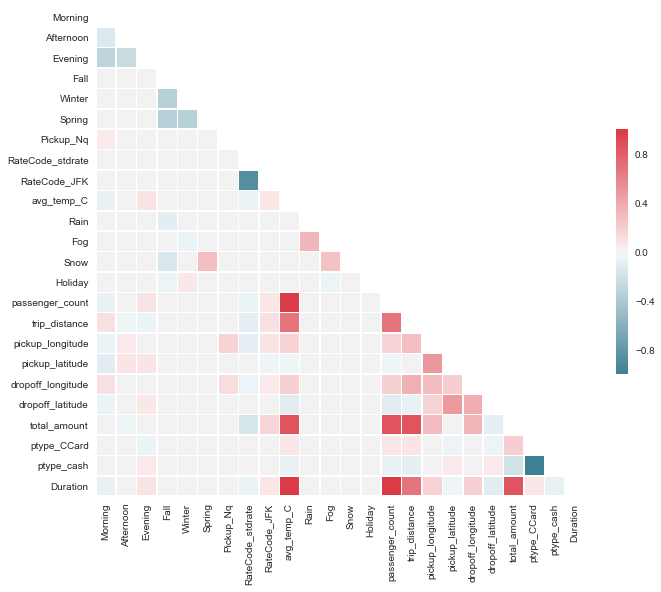

In [91]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


# Compute the correlation matrix
corr = dummy_df_clean_61cols_Pandas2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#PCA

In [310]:
va_PCA=feature.VectorAssembler(inputCols=[c for c in numeric_data.columns],
                           outputCol='features')
sc_PCA=feature.StandardScaler(withMean=True,
                           inputCol='features', outputCol='zfeatures'
                          )
pca= feature.PCA(k=6, inputCol='zfeatures', outputCol='PCAloadings')

In [311]:
pipeline_one_PCA = Pipeline(stages=[ va_PCA,sc_PCA,pca]).fit(dummy_df_clean_61cols_Spark)

In [283]:
explainedVariance = pipeline_one_PCA.stages[-1].explainedVariance

In [312]:
best_k = 0
for k in range(len(explainedVariance)):
    if explainedVariance[k] < 0.05:
        best_k = k-1
        break
best_k

4

In [313]:
explainedVariance[best_k]

0.057540153757355404

In [314]:
principal_components = pipeline_one_PCA.stages[-1].pc.toArray()

In [315]:
principal_components

array([[-0.52639206,  0.3837901 , -0.02447939,  0.23772706, -0.0300041 ,
         0.71944625],
       [-0.42124128, -0.22758543,  0.58199093, -0.43978061,  0.48850642,
        -0.00130838],
       [-0.25167869, -0.5557811 ,  0.35765083,  0.28167669, -0.64845205,
         0.00438992],
       [-0.43006642, -0.1502623 , -0.58369045, -0.60325007, -0.28872113,
        -0.06707479],
       [-0.1844926 , -0.56091676, -0.43787431,  0.45008447,  0.50650996,
         0.02173906],
       [-0.51296235,  0.39346032,  0.01856723,  0.32287834,  0.00767764,
        -0.69094464]])

In [316]:
z = pipeline_one_PCA.transform(dummy_df_clean_61cols_Spark).select('zfeatures', 'PCAloadings').first()['zfeatures']

In [317]:
z.dot(principal_components)

array([ 0.92203183, -1.02685208,  0.21456233, -0.03637755, -0.16163563,
        0.04985908])

In [327]:
abs_loading_list=list(zip([c for c in numeric_data.columns],principal_components[:, 5]))

In [328]:
pc_best = pipeline_one_PCA.stages[-1].pc.toArray()[:, 5].tolist()

In [329]:
abs_loading_list

[('trip_distance', 0.7194462527899649),
 ('pickup_longitude', -0.0013083750165691216),
 ('pickup_latitude', 0.00438991561735012),
 ('dropoff_longitude', -0.06707478874493442),
 ('dropoff_latitude', 0.021739061209638255),
 ('total_amount', -0.6909446374889328)]

In [330]:
pc_loadings = pd.DataFrame(abs_loading_list).rename(columns={0: 'Feature', 
                                                                          1: 'pc_best',})

In [331]:
pc_loadings.head()

,Feature,pc_best
0,trip_distance,0.719446
1,pickup_longitude,-0.001308
2,pickup_latitude,0.004390
3,dropoff_longitude,-0.067075
4,dropoff_latitude,0.021739


In [332]:
feature_engineering_duration=pc_loadings.sort_values('pc_best').\
    apply({'Feature': lambda x: x, 'pc_best': np.abs}, axis=0)

In [333]:
feature_engineering_duration

,Feature,pc_best
5,total_amount,0.690945
3,dropoff_longitude,0.067075
1,pickup_longitude,0.001308
2,pickup_latitude,0.004390
4,dropoff_latitude,0.021739
0,trip_distance,0.719446


In [306]:
selected_features=feature_engineering_duration[feature_engineering_duration['pc_best']>0.01]

In [307]:
selected_features['Feature'].tolist()

['total_amount', 'dropoff_longitude', 'dropoff_latitude', 'trip_distance']

In [92]:
#Exploratory Data Analysis:

In [341]:
dummy_df1.columns

Index(['VendorID_1_0', 'store_and_fwd_flag_1_0', 'RateCode_stdrate',
       'RateCode_JFK', 'RateCode_Newark', 'RateCode_Nassau_W',
       'RateCode_Negotiated', 'RateCode_Group', 'avg_temp_C', 'Rain', 'Fog',
       'Snow', 'Holiday', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'total_amount', 'pickup_neighborhood', 'dropoff_neighborhood',
       'ptype_CCard', 'ptype_cash', 'ptype_nocharge', 'ptype_dispute',
       'ptype_voidtrip', 'Duration', 'day_of_week', 'pickup_hour', 'month'],
      dtype='object')

In [342]:
type(dummy_df1)

pandas.core.frame.DataFrame

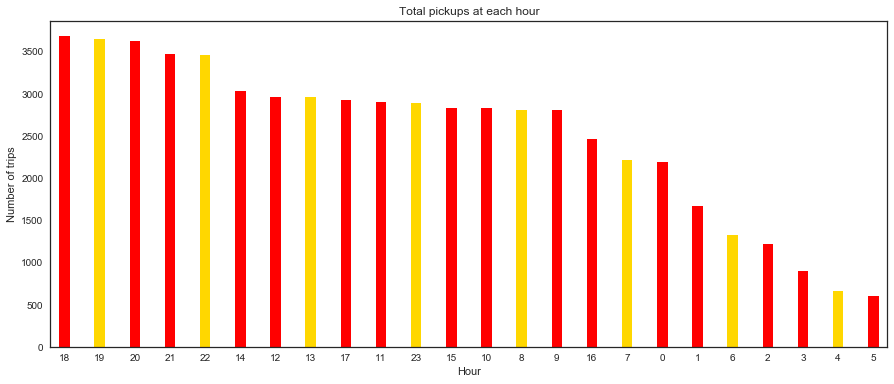

In [343]:
plt.figure(figsize=(15, 6)) 
dummy_df1.pickup_hour.value_counts().plot(kind='bar',color=["red","gold"],align='center',width=0.3)
plt.xlabel("Hour")
plt.xticks(rotation='horizontal')
plt.ylabel("Number of trips")
plt.title("Total pickups at each hour");

In [346]:
from datetime import datetime as dt


In [348]:
dummy_df1["dropOff_hour"]=dummy_df1.dropoff_datetime.dt.hour

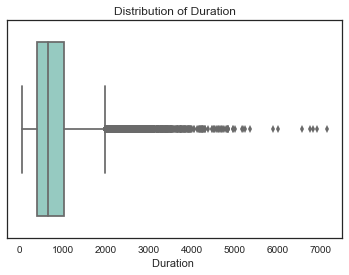

In [349]:
sns.boxplot(dummy_df1['Duration'], palette="Set3" )
plt.xlabel('Duration ')
plt.title('Distribution of Duration')
plt.show()

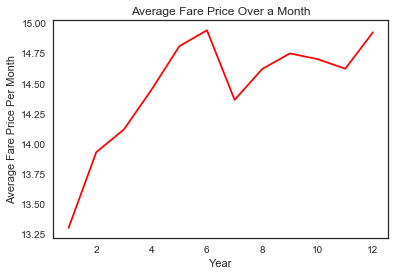

In [351]:
taxi_rate = dummy_df1.groupby(['month']).mean()

plt.plot(taxi_rate.index, taxi_rate.total_amount, color = 'r')

plt.xlabel('Year')
plt.ylabel('Average Fare Price Per Month')
plt.title('Average Fare Price Over a Month')
plt.show()

In [ ]:
#####################--------------------------Scaling:------------------------------#########################

In [93]:
dummy_df_toBe_Scaled= dummy_df_clean_61cols_Spark

In [94]:
len(dummy_df_toBe_Scaled.columns)

61

In [95]:
data = dummy_df_toBe_Scaled

In [96]:
#dummy_df_toBe_Scaled.toPandas().to_csv(header=True, path_or_buf='/Users/apsharma/IST718 Dropbox/Final/dummy_df_toBe_ScaledForTotalAmt_Dec5.csv')

In [97]:
#read data if server error--

In [100]:
#read data :
#data1 = pd.read_csv("/Users/apsharma/IST718 Dropbox/Final/dummy_df_toBe_ScaledForTotalAmt_Dec5.csv")

In [102]:
data.printSchema()

root
 |-- Morning: integer (nullable = false)
 |-- Afternoon: integer (nullable = false)
 |-- Evening: integer (nullable = false)
 |-- Fall: integer (nullable = false)
 |-- Winter: integer (nullable = false)
 |-- Spring: integer (nullable = false)
 |-- Monday: integer (nullable = false)
 |-- Tuesday: integer (nullable = false)
 |-- Wednesday: integer (nullable = false)
 |-- Thursday: integer (nullable = false)
 |-- Friday: integer (nullable = false)
 |-- Saturday: integer (nullable = false)
 |-- Sunday: integer (nullable = false)
 |-- dropoff_cc: integer (nullable = false)
 |-- dropoff_GM: integer (nullable = false)
 |-- dropoff_ues: integer (nullable = false)
 |-- dropoff_Gvs: integer (nullable = false)
 |-- dropoff_Uws: integer (nullable = false)
 |-- dropoff_Les: integer (nullable = false)
 |-- dropoff_Lm: integer (nullable = false)
 |-- dropoff_Wq: integer (nullable = false)
 |-- dropoff_Nb: integer (nullable = false)
 |-- dropoff_ch: integer (nullable = false)
 |-- Pickup_cc: inte

In [103]:
##  Scaling and Standardization:

In [104]:
#Important - Removing some columns for Total Amount and Duration prediction !!!
data = data.drop("pickup_datetime","dropoff_datetime","pickup_weekday_name","trip_distance","passenger_count")

In [105]:
len(data.columns)

57

In [106]:
data.columns

['Morning',
 'Afternoon',
 'Evening',
 'Fall',
 'Winter',
 'Spring',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'dropoff_cc',
 'dropoff_GM',
 'dropoff_ues',
 'dropoff_Gvs',
 'dropoff_Uws',
 'dropoff_Les',
 'dropoff_Lm',
 'dropoff_Wq',
 'dropoff_Nb',
 'dropoff_ch',
 'Pickup_cc',
 'Pickup_GM',
 'Pickup_ues',
 'Pickup_Gvs',
 'Pickup_Uws',
 'Pickup_Les',
 'Pickup_Lm',
 'Pickup_Wq',
 'Pickup_Nb',
 'Pickup_Nq',
 'VendorID_1_0',
 'store_and_fwd_flag_1_0',
 'RateCode_stdrate',
 'RateCode_JFK',
 'RateCode_Newark',
 'RateCode_Nassau_W',
 'RateCode_Negotiated',
 'RateCode_Group',
 'avg_temp_C',
 'Rain',
 'Fog',
 'Snow',
 'Holiday',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'total_amount',
 'ptype_CCard',
 'ptype_cash',
 'ptype_nocharge',
 'ptype_dispute',
 'ptype_voidtrip',
 'Duration']

In [107]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors
va = feature.VectorAssembler(inputCols=['Morning',
 'Afternoon',
 'Evening',
 'Fall',
 'Winter',
 'Spring',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'dropoff_cc',
 'dropoff_GM',
 'dropoff_ues',
 'dropoff_Gvs',
 'dropoff_Uws',
 'dropoff_Les',
 'dropoff_Lm',
 'dropoff_Wq',
 'dropoff_Nb',
 'dropoff_ch',
 'Pickup_cc',
 'Pickup_GM',
 'Pickup_ues',
 'Pickup_Gvs',
 'Pickup_Uws',
 'Pickup_Les',
 'Pickup_Lm',
 'Pickup_Wq',
 'Pickup_Nb',
 'Pickup_Nq',
 'VendorID_1_0',
 'store_and_fwd_flag_1_0',
 'RateCode_stdrate',
 'RateCode_JFK',
 'RateCode_Newark',
 'RateCode_Nassau_W',
 'RateCode_Negotiated',
 'RateCode_Group',
 'avg_temp_C',
 'Rain',
 'Fog',
 'Snow',
 'Holiday',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'ptype_CCard',
 'ptype_cash',
 'ptype_nocharge',
 'ptype_dispute',
 'ptype_voidtrip'] , outputCol='features')
vec_df= va.transform(data)
scaler = MinMaxScaler(inputCol='features', outputCol='scaledFeatures')

In [108]:
scalerModel = scaler.fit(vec_df)
scaled_df = scalerModel.transform(vec_df)

In [109]:
scaled_df.columns

['Morning',
 'Afternoon',
 'Evening',
 'Fall',
 'Winter',
 'Spring',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'dropoff_cc',
 'dropoff_GM',
 'dropoff_ues',
 'dropoff_Gvs',
 'dropoff_Uws',
 'dropoff_Les',
 'dropoff_Lm',
 'dropoff_Wq',
 'dropoff_Nb',
 'dropoff_ch',
 'Pickup_cc',
 'Pickup_GM',
 'Pickup_ues',
 'Pickup_Gvs',
 'Pickup_Uws',
 'Pickup_Les',
 'Pickup_Lm',
 'Pickup_Wq',
 'Pickup_Nb',
 'Pickup_Nq',
 'VendorID_1_0',
 'store_and_fwd_flag_1_0',
 'RateCode_stdrate',
 'RateCode_JFK',
 'RateCode_Newark',
 'RateCode_Nassau_W',
 'RateCode_Negotiated',
 'RateCode_Group',
 'avg_temp_C',
 'Rain',
 'Fog',
 'Snow',
 'Holiday',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'total_amount',
 'ptype_CCard',
 'ptype_cash',
 'ptype_nocharge',
 'ptype_dispute',
 'ptype_voidtrip',
 'Duration',
 'features',
 'scaledFeatures']

In [110]:
len(scaled_df.columns)

59

In [111]:
scaled_df.show(1)

+-------+---------+-------+----+------+------+------+-------+---------+--------+------+--------+------+----------+----------+-----------+-----------+-----------+-----------+----------+----------+----------+----------+---------+---------+----------+----------+----------+----------+---------+---------+---------+---------+------------+----------------------+----------------+------------+---------------+-----------------+-------------------+--------------+----------+----+---+----+-------+------------------+------------------+-----------------+------------------+------------+-----------+----------+--------------+-------------+--------------+--------+--------------------+--------------------+
|Morning|Afternoon|Evening|Fall|Winter|Spring|Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday|dropoff_cc|dropoff_GM|dropoff_ues|dropoff_Gvs|dropoff_Uws|dropoff_Les|dropoff_Lm|dropoff_Wq|dropoff_Nb|dropoff_ch|Pickup_cc|Pickup_GM|Pickup_ues|Pickup_Gvs|Pickup_Uws|Pickup_Les|Pickup_Lm|Pickup_Wq|Pic

In [112]:
#SPLITTING:
# splitting the scaled dataframe into training, validation and test dataframe

In [113]:
training_df_Dec5, validation_df_Dec5, testing_df_Dec5 = scaled_df.randomSplit([0.6, 0.3, 0.1], seed=12)

In [114]:
#training_df_Dec5.toPandas().to_csv(header=True, path_or_buf='/Users/apsharma/IST718 Dropbox/Final/training_df_Dec5.csv')

In [115]:
#print("# points in training: ", training_df_Nov16.count()) 

In [116]:
#validation_df_Dec5.toPandas().to_csv(header=True, path_or_buf='/Users/apsharma/IST718 Dropbox/Final/validation_df_Dec5.csv')

In [117]:
#print("# points in validation: ", validation_df_Nov16.count()) 

In [118]:
#testing_df_Dec5.toPandas().to_csv(header=True, path_or_buf='/Users/apsharma/IST718 Dropbox/Final/testing_df_Dec5.csv')

In [119]:
#print("# points in testing: ", testing_df_Nov16.count()) 

In [120]:
training_df = training_df_Dec5
validation_df = validation_df_Dec5
testing_df = testing_df_Dec5

In [121]:
####--------------------------------------------MODELLING ANALYSIS ---------------------------------------

In [122]:
#Linear Model:

In [123]:
# 1) linear regression model for the total amount prediction------------------------------------

In [124]:
# defining the linear regression model object
linearmodel_amt = regression.LinearRegression(featuresCol="scaledFeatures", labelCol = "total_amount")

In [125]:
# fit the model on the training data 
modellinear_amt = linearmodel_amt.fit(training_df)

In [126]:
# transform the validation data
predictionslinear = modellinear_amt.transform(validation_df)

In [127]:
# calculate the rmse on the validation data
rmse1_df_amt_linear = predictionslinear.select(fn.sqrt
                                (fn.sum
                                 (fn.pow
                                  (predictionslinear.prediction - predictionslinear.total_amount,
                                   fn.lit(2)
                                  )
                                 )
                                 /predictionslinear.count()
                                ).alias("rmse_amt"))

In [128]:
rmse1_df_amt_linear.show()

+-----------------+
|         rmse_amt|
+-----------------+
|3.665235900726855|
+-----------------+



In [129]:
# 2) random forest regression model for the total amount prediction

In [130]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import GBTRegressor

randomf_amt = RandomForestRegressor(featuresCol="scaledFeatures", labelCol = "total_amount")

In [131]:
# fit the model on the training data

modelrandom_amt = randomf_amt.fit(training_df)

In [132]:
# transform the validation data

predictionsrandom_amt = modelrandom_amt.transform(validation_df)

In [133]:
# calculation of rmse on the validation data
evaluatorrandom_amt = RegressionEvaluator(labelCol="total_amount", predictionCol="prediction", metricName="rmse")

rmserandom_amt = evaluatorrandom_amt.evaluate(predictionsrandom_amt)

print("Root Mean Squared Error (RMSE) on validation = %g" % rmserandom_amt)

Root Mean Squared Error (RMSE) on validation = 3.90161


In [134]:
# gradient boosting regression model for the total amount prediction---------------------------

In [135]:
from pyspark.ml.regression import GBTRegressor

In [136]:
# defining the gradient boosting object
gbt_amt = GBTRegressor(featuresCol="scaledFeatures", labelCol = "total_amount", maxIter=10)

In [137]:
# fit the model on the training data
modelgbt_amt = gbt_amt.fit(training_df)

In [138]:
# transform the validation data
predictionsgbt_amt = modelgbt_amt.transform(validation_df)

In [139]:
# calculating the rmse on validation data
evaluatorgbt = RegressionEvaluator(labelCol="total_amount", predictionCol="prediction", metricName="rmse")

rmsegbt_amt = evaluatorgbt.evaluate(predictionsgbt_amt)

print("Root Mean Squared Error (RMSE) for total amount on validation data = %g" % rmsegbt_amt)

Root Mean Squared Error (RMSE) for total amount on validation data = 3.31603


In [140]:
# After removing target leakage contributing features and dropping correlated coluns,
#the best model is the gradient boosting as per the given rmse values

In [141]:
best_model_amt = modelgbt_amt

In [142]:
# transform the testing data on the best model
prediction_best = best_model_amt.transform(testing_df)

In [143]:
# calculating the best_rmse on testing data
evaluatorbest = RegressionEvaluator(labelCol="total_amount", predictionCol="prediction", metricName="rmse")

rmsetest = evaluatorbest.evaluate(prediction_best)

print("Root Mean Squared Error (RMSE) on testing data = %g" % rmsetest)


Root Mean Squared Error (RMSE) on testing data = 3.01548


   ### The best rmse for predicting the total amount on the testing data is $2.95069

In [144]:
# predicting the duration based on three models ---------------------------------------------------------

In [145]:
# 1) linear model for predicting duration

linearmodel_dura = regression.LinearRegression(featuresCol="scaledFeatures", labelCol = "Duration")

In [146]:
modellinear_dura = linearmodel_dura.fit(training_df)

In [147]:
predictionslinear_dura = modellinear_dura.transform(validation_df)

In [148]:
rmse1_df_dura = predictionslinear_dura.select(fn.sqrt
                                (fn.sum
                                 (fn.pow
                                  (predictionslinear_dura.prediction - predictionslinear_dura.Duration,
                                   fn.lit(2)
                                  )
                                 )
                                 /predictionslinear_dura.count()
                                ).alias("rmse_dura"))

In [149]:
rmse1_df_dura.show()

+-------------------+
|          rmse_dura|
+-------------------+
|0.01482460564774702|
+-------------------+



In [150]:
# 2) Random forest model for the trip duration prediction------------------------------------

In [151]:
randomf_dura = RandomForestRegressor(featuresCol="scaledFeatures", labelCol = "Duration")

In [152]:
modelrandom_dura = randomf_dura.fit(training_df)

In [153]:
predictionsrandom_dura = modelrandom_dura.transform(validation_df)

In [154]:
evaluatorrandom_dura = RegressionEvaluator(labelCol="Duration", predictionCol="prediction", metricName="rmse")

rmserandom_dura = evaluatorrandom_dura.evaluate(predictionsrandom_dura)

print("Root Mean Squared Error (RMSE) of random forest on validation = %g" % rmserandom_dura)

Root Mean Squared Error (RMSE) of random forest on validation = 166.27


In [155]:
# 3) Gradient Boosting model for the trip duration prediction------------------------------------

In [156]:
gbt_dura = GBTRegressor(featuresCol="scaledFeatures", labelCol = "Duration", maxIter=10)

In [157]:
modelgbt_dura = gbt_dura.fit(training_df)

In [158]:
predictionsgbt_dura = modelgbt_dura.transform(validation_df)

In [159]:
evaluatorgbt_dura = RegressionEvaluator(labelCol="Duration", predictionCol="prediction", metricName="rmse")

rmsegbt_dura = evaluatorgbt_dura.evaluate(predictionsgbt_dura)

print("Root Mean Squared Error (RMSE) of GBT on validation data = %g" % rmsegbt_dura)

Root Mean Squared Error (RMSE) of GBT on validation data = 104.476


In [160]:
best_model_dur = modelgbt_dura

In [161]:
# transform the testing data on the best model
predictionsgbt_best_dur = best_model_dur.transform(testing_df)

In [162]:
# calculating the best_rmse on testing data
evaluatorgbt_best = RegressionEvaluator(labelCol="Duration", predictionCol="prediction", metricName="rmse")

rmsegbt_dur = evaluatorgbt_best.evaluate(predictionsgbt_best_dur)

print("Root Mean Squared Error (RMSE) on testing data = %g" % rmsegbt_dur)

Root Mean Squared Error (RMSE) on testing data = 83.6365


##### The best rmse for predicting the duration on the testing data is 103 sec

In [163]:
#Acuna Values:

In [164]:
#Predicting duration on Professor's hypothetical scenario:

In [165]:
acunavalues=[0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,
2,
1,
0,
0,
1,
73.87,
40.77,
73.96,
40.78,
1,
0,
0,
0,
0]

In [166]:
#Creating datafarme:
xyz=pd.DataFrame(acunavalues)

In [167]:
type(xyz)
xyz.T

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,73.87,40.77,73.96,40.78,1.0,0.0,0.0,0.0,0.0


In [168]:
type(xyz)

pandas.core.frame.DataFrame

In [169]:
#xyz

In [170]:
xyz1=xyz.T.rename(columns={0:'Morning',1: 'Afternoon',2:'Evening',3: 'Fall',4: 'Winter',5:'Spring',6:'Monday',
7: 'Tuesday',8: 'Wednesday',9: 'Thursday',10: 'Friday',11: 'Saturday',12: 'Sunday',13: 'dropoff_cc',14: 'dropoff_GM',
15: 'dropoff_ues',16: 'dropoff_Gvs',17: 'dropoff_Uws',18: 'dropoff_Les',19: 'dropoff_Lm',20: 'dropoff_Wq',
21: 'dropoff_Nb',22: 'dropoff_ch',23: 'Pickup_cc',24: 'Pickup_GM',25: 'Pickup_ues',26: 'Pickup_Gvs',27: 'Pickup_Uws',
28: 'Pickup_Les',29: 'Pickup_Lm',30: 'Pickup_Wq',31:'Pickup_Nb',32: 'Pickup_Nq',33: 'VendorID_1_0',
34: 'store_and_fwd_flag_1_0',35: 'RateCode_stdrate',36: 'RateCode_JFK',37: 'RateCode_Newark',38: 'RateCode_Nassau_W',
39: 'RateCode_Negotiated',40:'RateCode_Group',41:'avg_temp_C',42: 'Rain',43: 'Fog',44: 'Snow',45: 'Holiday',
46: 'pickup_longitude',47: 'pickup_latitude',48: 'dropoff_longitude',49: 'dropoff_latitude',
50: 'ptype_CCard',51: 'ptype_cash',52: 'ptype_nocharge',53: 'ptype_dispute',54: 'ptype_voidtrip'})

In [171]:
xyz1.T.head(55)

,0
Morning,0.00
Afternoon,0.00
Evening,1.00
Fall,0.00
Winter,1.00
Spring,0.00
Monday,0.00
Tuesday,0.00
Wednesday,0.00
Thursday,0.00


In [172]:
xyzspark=spark.createDataFrame(xyz1)

In [173]:
va3 = feature.VectorAssembler(inputCols=['Morning',
 'Afternoon',
 'Evening',
 'Fall',
 'Winter',
 'Spring',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'dropoff_cc',
 'dropoff_GM',
 'dropoff_ues',
 'dropoff_Gvs',
 'dropoff_Uws',
 'dropoff_Les',
 'dropoff_Lm',
 'dropoff_Wq',
 'dropoff_Nb',
 'dropoff_ch',
 'Pickup_cc',
 'Pickup_GM',
 'Pickup_ues',
 'Pickup_Gvs',
 'Pickup_Uws',
 'Pickup_Les',
 'Pickup_Lm',
 'Pickup_Wq',
 'Pickup_Nb',
 'Pickup_Nq',
 'VendorID_1_0',
 'store_and_fwd_flag_1_0',
 'RateCode_stdrate',
 'RateCode_JFK',
 'RateCode_Newark',
 'RateCode_Nassau_W',
 'RateCode_Negotiated',
 'RateCode_Group',
 'avg_temp_C',
 'Rain',
 'Fog',
 'Snow',
 'Holiday',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'ptype_CCard',
 'ptype_cash',
 'ptype_nocharge',
 'ptype_dispute',
 'ptype_voidtrip'] , outputCol='features')
vec_df3= va3.transform(xyzspark)


In [174]:
scaled_df_new = scalerModel.transform(vec_df3)

In [175]:
scaled_df_new.show()

+-------+---------+-------+----+------+------+------+-------+---------+--------+------+--------+------+----------+----------+-----------+-----------+-----------+-----------+----------+----------+----------+----------+---------+---------+----------+----------+----------+----------+---------+---------+---------+---------+------------+----------------------+----------------+------------+---------------+-----------------+-------------------+--------------+----------+----+---+----+-------+----------------+---------------+-----------------+----------------+-----------+----------+--------------+-------------+--------------+--------------------+--------------------+
|Morning|Afternoon|Evening|Fall|Winter|Spring|Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday|dropoff_cc|dropoff_GM|dropoff_ues|dropoff_Gvs|dropoff_Uws|dropoff_Les|dropoff_Lm|dropoff_Wq|dropoff_Nb|dropoff_ch|Pickup_cc|Pickup_GM|Pickup_ues|Pickup_Gvs|Pickup_Uws|Pickup_Les|Pickup_Lm|Pickup_Wq|Pickup_Nb|Pickup_Nq|VendorID_1_0

In [176]:
predictionsgbt_acuna = modelrandom_dura.transform(scaled_df_new)

In [177]:
predictionsgbt_acuna.show()

+-------+---------+-------+----+------+------+------+-------+---------+--------+------+--------+------+----------+----------+-----------+-----------+-----------+-----------+----------+----------+----------+----------+---------+---------+----------+----------+----------+----------+---------+---------+---------+---------+------------+----------------------+----------------+------------+---------------+-----------------+-------------------+--------------+----------+----+---+----+-------+----------------+---------------+-----------------+----------------+-----------+----------+--------------+-------------+--------------+--------------------+--------------------+-----------------+
|Morning|Afternoon|Evening|Fall|Winter|Spring|Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday|dropoff_cc|dropoff_GM|dropoff_ues|dropoff_Gvs|dropoff_Uws|dropoff_Les|dropoff_Lm|dropoff_Wq|dropoff_Nb|dropoff_ch|Pickup_cc|Pickup_GM|Pickup_ues|Pickup_Gvs|Pickup_Uws|Pickup_Les|Pickup_Lm|Pickup_Wq|Pickup_Nb|Pick

In [178]:
#Total Amount prediction:

In [179]:
predictionsrandom_amt_acuna = modelrandom_amt.transform(scaled_df_new)

In [180]:
predictionsrandom_amt_acuna.show()

+-------+---------+-------+----+------+------+------+-------+---------+--------+------+--------+------+----------+----------+-----------+-----------+-----------+-----------+----------+----------+----------+----------+---------+---------+----------+----------+----------+----------+---------+---------+---------+---------+------------+----------------------+----------------+------------+---------------+-----------------+-------------------+--------------+----------+----+---+----+-------+----------------+---------------+-----------------+----------------+-----------+----------+--------------+-------------+--------------+--------------------+--------------------+-----------------+
|Morning|Afternoon|Evening|Fall|Winter|Spring|Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday|dropoff_cc|dropoff_GM|dropoff_ues|dropoff_Gvs|dropoff_Uws|dropoff_Les|dropoff_Lm|dropoff_Wq|dropoff_Nb|dropoff_ch|Pickup_cc|Pickup_GM|Pickup_ues|Pickup_Gvs|Pickup_Uws|Pickup_Les|Pickup_Lm|Pickup_Wq|Pickup_Nb|Pick

In [181]:
#Predicted Time duration for Professor Acuna's trip: 601 seconds
#Predicted Fare for Professor Acuna's trip: $ 35.141 

In [182]:
#----------------------------------------------XGB-------------------------------------------------------------------

In [183]:
# XG Boosting Model and feature importance

In [184]:
# 1) XG boost and important features for total amount
import xgboost as xgb

In [185]:
import os

import findspark
findspark.init()

import pyspark
from pyspark.sql.session import SparkSession
from pyspark.sql.types import *
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

In [186]:
spark.sparkContext.addPyFile("/Users/apsharma/Downloads/sparkxgb.zip")

In [187]:
import xgboost as xgb

In [188]:
from sparkxgb import XGBoostEstimator

In [189]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars /Users/apsharma/Downloads/xgboost4j-spark-0.81.jar,/Users/apsharma/Downloads/xgboost4j-0.81.jar pyspark-shell'

In [190]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [191]:
scaled_df.columns

['Morning',
 'Afternoon',
 'Evening',
 'Fall',
 'Winter',
 'Spring',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'dropoff_cc',
 'dropoff_GM',
 'dropoff_ues',
 'dropoff_Gvs',
 'dropoff_Uws',
 'dropoff_Les',
 'dropoff_Lm',
 'dropoff_Wq',
 'dropoff_Nb',
 'dropoff_ch',
 'Pickup_cc',
 'Pickup_GM',
 'Pickup_ues',
 'Pickup_Gvs',
 'Pickup_Uws',
 'Pickup_Les',
 'Pickup_Lm',
 'Pickup_Wq',
 'Pickup_Nb',
 'Pickup_Nq',
 'VendorID_1_0',
 'store_and_fwd_flag_1_0',
 'RateCode_stdrate',
 'RateCode_JFK',
 'RateCode_Newark',
 'RateCode_Nassau_W',
 'RateCode_Negotiated',
 'RateCode_Group',
 'avg_temp_C',
 'Rain',
 'Fog',
 'Snow',
 'Holiday',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'total_amount',
 'ptype_CCard',
 'ptype_cash',
 'ptype_nocharge',
 'ptype_dispute',
 'ptype_voidtrip',
 'Duration',
 'features',
 'scaledFeatures']

In [192]:
scaled_df_Pandas = scaled_df.toPandas()

In [193]:
scaled_df_Pandasnew = scaled_df_Pandas

In [194]:
scaled_df_numpy = scaled_df_Pandasnew.values

In [195]:
scaled_df_Pandas.columns

Index(['Morning', 'Afternoon', 'Evening', 'Fall', 'Winter', 'Spring', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'dropoff_cc', 'dropoff_GM', 'dropoff_ues', 'dropoff_Gvs', 'dropoff_Uws',
       'dropoff_Les', 'dropoff_Lm', 'dropoff_Wq', 'dropoff_Nb', 'dropoff_ch',
       'Pickup_cc', 'Pickup_GM', 'Pickup_ues', 'Pickup_Gvs', 'Pickup_Uws',
       'Pickup_Les', 'Pickup_Lm', 'Pickup_Wq', 'Pickup_Nb', 'Pickup_Nq',
       'VendorID_1_0', 'store_and_fwd_flag_1_0', 'RateCode_stdrate',
       'RateCode_JFK', 'RateCode_Newark', 'RateCode_Nassau_W',
       'RateCode_Negotiated', 'RateCode_Group', 'avg_temp_C', 'Rain', 'Fog',
       'Snow', 'Holiday', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'total_amount', 'ptype_CCard',
       'ptype_cash', 'ptype_nocharge', 'ptype_dispute', 'ptype_voidtrip',
       'Duration', 'features', 'scaledFeatures'],
      dtype='object')

In [196]:
len(scaled_df_Pandas.columns)

59

In [197]:
scaled_df_Pandas_Amt = scaled_df_Pandas

In [198]:
scaled_df_Pandas.columns.get_loc("total_amount")

50

In [199]:
scaled_df_Pandas_np= scaled_df_Pandas.values

In [200]:
scaled_df_Pandas_np

array([[0, 0, 1, ..., 161,
        SparseVector(55, {2: 1.0, 5: 1.0, 6: 1.0, 13: 1.0, 23: 1.0, 33: 1.0, 35: 1.0, 41: 161.0, 42: 1.0, 46: -73.9804, 47: 40.7649, 48: -73.984, 49: 40.7593, 51: 1.0}),
        DenseVector([0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0141, 1.0, 0.0, 0.0, 0.0, 0.3003, 0.5937, 0.3925, 0.5795, 0.0, 1.0, 0.0, 0.0, 0.5])],
       [0, 0, 0, ..., 2115,
        SparseVector(55, {5: 1.0, 6: 1.0, 23: 1.0, 35: 1.0, 41: 2115.0, 42: 1.0, 46: -73.9961, 47: 40.7382, 48: -74.0029, 49: 40.6248, 51: 1.0}),
        DenseVector([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.2899, 1.0, 0.0, 0.0, 0.0, 0.2562, 0.5054, 0.3514, 0.204, 0.0, 1.0, 0.0, 0.0, 0.5])],
  

In [201]:
# split data into X and y
X = scaled_df_Pandas_np[:,0:49]
Y = scaled_df_Pandas_np[:,49]

In [202]:
Y

array([40.759315490722656, 40.62480163574219, 40.742774963378906, ...,
       40.74285507202149, 40.66598129272461, 40.779727935791016],
      dtype=object)

In [203]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [204]:
# fit model on training data
model_amt = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
model_amt.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [205]:
# make predictions for test data
y_pred_amt = model_amt.predict(X_test)
predictions_amt = [round(value) for value in y_pred_amt]


In [206]:
#evaluate predictions
#accuracy = accuracy_score(y_test, predictions_amt)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [207]:
#Accuracy: 77.95%

In [208]:
print(model_amt.feature_importances_)

[0.02028081 0.01560062 0.01092044 0.00624025 0.00468019 0.00312012
 0.00312012 0.00312012 0.00312012 0.00312012 0.00468019 0.00156006
 0.00936037 0.00624025 0.00936037 0.00468019 0.00780031 0.00780031
 0.00936037 0.01092044 0.01404056 0.00780031 0.         0.01404056
 0.00936037 0.00468019 0.01716069 0.00468019 0.00936037 0.00312012
 0.00468019 0.00312012 0.00312012 0.         0.00156006 0.00156006
 0.         0.         0.         0.         0.         0.20436817
 0.00156006 0.00156006 0.00156006 0.         0.10920437 0.15132606
 0.28705147]


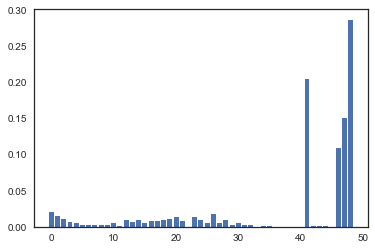

In [209]:
import matplotlib.pyplot as plt
plt.bar(range(len(model_amt.feature_importances_)), model_amt.feature_importances_)
plt.show()

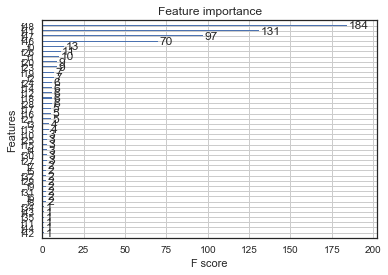

In [210]:
import matplotlib.pyplot as pyplot
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import plot_importance
plot_importance(model_amt)
pyplot.show()

In [211]:
scaled_df_Pandasnew.columns[48]

'dropoff_longitude'

In [212]:
feature_array_amt = model_amt.feature_importances_

In [213]:
feature_array_amt

array([0.02028081, 0.01560062, 0.01092044, 0.00624025, 0.00468019,
       0.00312012, 0.00312012, 0.00312012, 0.00312012, 0.00312012,
       0.00468019, 0.00156006, 0.00936037, 0.00624025, 0.00936037,
       0.00468019, 0.00780031, 0.00780031, 0.00936037, 0.01092044,
       0.01404056, 0.00780031, 0.        , 0.01404056, 0.00936037,
       0.00468019, 0.01716069, 0.00468019, 0.00936037, 0.00312012,
       0.00468019, 0.00312012, 0.00312012, 0.        , 0.00156006,
       0.00156006, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.20436817, 0.00156006, 0.00156006, 0.00156006,
       0.        , 0.10920437, 0.15132606, 0.28705147], dtype=float32)

In [214]:
len(feature_array_amt)

49

In [215]:
feature_array_sorted_amt = -np.sort(-feature_array_amt)

In [216]:
print(feature_array_sorted_amt)

[0.28705147 0.20436817 0.15132606 0.10920437 0.02028081 0.01716069
 0.01560062 0.01404056 0.01404056 0.01092044 0.01092044 0.00936037
 0.00936037 0.00936037 0.00936037 0.00936037 0.00780031 0.00780031
 0.00780031 0.00624025 0.00624025 0.00468019 0.00468019 0.00468019
 0.00468019 0.00468019 0.00468019 0.00312012 0.00312012 0.00312012
 0.00312012 0.00312012 0.00312012 0.00312012 0.00312012 0.00156006
 0.00156006 0.00156006 0.00156006 0.00156006 0.00156006 0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [217]:
feature_array_sorted_amt[0:15]

array([0.28705147, 0.20436817, 0.15132606, 0.10920437, 0.02028081,
       0.01716069, 0.01560062, 0.01404056, 0.01404056, 0.01092044,
       0.01092044, 0.00936037, 0.00936037, 0.00936037, 0.00936037],
      dtype=float32)

In [218]:
feature_importance_amt = pd.DataFrame(list(zip(scaled_df_Pandasnew.columns[0:62],feature_array_amt)),
            columns = ['feature', 'importance']).sort_values('importance', ascending = False)

In [219]:
feature_importance_amt
#Most important features for predicting Total Amount

,feature,importance
48,dropoff_longitude,0.287051
41,avg_temp_C,0.204368
47,pickup_latitude,0.151326
46,pickup_longitude,0.109204
0,Morning,0.020281
26,Pickup_Gvs,0.017161
1,Afternoon,0.015601
23,Pickup_cc,0.014041
20,dropoff_Wq,0.014041
2,Evening,0.010920


In [220]:
#XG Bosst and feature importance for duration

In [221]:
len(scaled_df_Pandas.columns)

59

In [222]:
scaled_df_Pandas.columns.get_loc("Duration")

56

In [223]:
# split data into X and y
X = scaled_df_numpy[:,0:56]
Y = scaled_df_numpy[:,56]

In [224]:
Y

array([161, 2115, 248, ..., 422, 2099, 334], dtype=object)

In [225]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [226]:
# fit model on training data
model_dura = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
model_dura.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [227]:
# make predictions for test data
y_pred = model_dura.predict(X_test)
predictions_dura = [round(value) for value in y_pred]


In [228]:
# # evaluate predictions
# accuracy_dura = accuracy_score(y_test, predictions_dura)
# print("Accuracy: %.2f%%" % (accuracy_dura * 100.0))
#Accuracy for Duration: 63.9%

In [229]:
print(model_dura.feature_importances_)

[3.5304502e-03 3.5304502e-03 2.5007355e-03 3.6775523e-03 2.2065314e-03
 2.7949398e-03 2.0594292e-03 2.3536335e-03 4.5601646e-03 2.3536335e-03
 2.6478376e-03 4.4130627e-04 2.3536335e-03 4.4130627e-04 8.8261254e-04
 5.8840838e-04 4.4130627e-04 1.4710210e-04 8.8261254e-04 2.9420419e-04
 7.3551043e-04 0.0000000e+00 0.0000000e+00 4.4130627e-04 5.8840838e-04
 2.9420419e-04 1.6181230e-03 1.4710210e-04 4.4130627e-04 4.4130627e-04
 4.4130627e-04 0.0000000e+00 7.3551043e-04 2.0594292e-03 5.8840838e-04
 1.4710210e-04 1.4710210e-04 0.0000000e+00 0.0000000e+00 4.4130627e-04
 0.0000000e+00 7.7993530e-01 1.6181230e-03 8.8261254e-04 5.8840838e-04
 0.0000000e+00 3.3392172e-02 2.8096499e-02 2.9567519e-02 4.2512503e-02
 3.3833481e-02 4.4130627e-04 5.8840838e-04 4.4130627e-04 1.4710210e-04
 0.0000000e+00]


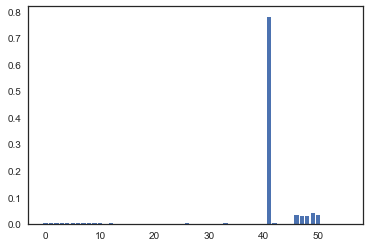

In [230]:
import matplotlib.pyplot as plt
plt.bar(range(len(model_dura.feature_importances_)), model_dura.feature_importances_)
plt.show()


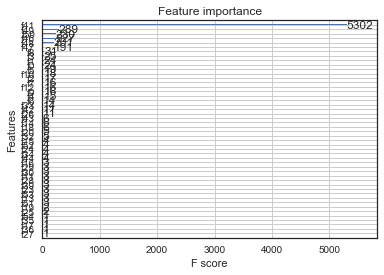

In [231]:

# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import plot_importance
plot_importance(model_dura)
pyplot.show()

In [232]:
scaled_df_Pandas.columns[48]

'dropoff_longitude'

In [233]:
feature_array_dura = model_dura.feature_importances_

In [234]:
feature_array_dura

array([3.5304502e-03, 3.5304502e-03, 2.5007355e-03, 3.6775523e-03,
       2.2065314e-03, 2.7949398e-03, 2.0594292e-03, 2.3536335e-03,
       4.5601646e-03, 2.3536335e-03, 2.6478376e-03, 4.4130627e-04,
       2.3536335e-03, 4.4130627e-04, 8.8261254e-04, 5.8840838e-04,
       4.4130627e-04, 1.4710210e-04, 8.8261254e-04, 2.9420419e-04,
       7.3551043e-04, 0.0000000e+00, 0.0000000e+00, 4.4130627e-04,
       5.8840838e-04, 2.9420419e-04, 1.6181230e-03, 1.4710210e-04,
       4.4130627e-04, 4.4130627e-04, 4.4130627e-04, 0.0000000e+00,
       7.3551043e-04, 2.0594292e-03, 5.8840838e-04, 1.4710210e-04,
       1.4710210e-04, 0.0000000e+00, 0.0000000e+00, 4.4130627e-04,
       0.0000000e+00, 7.7993530e-01, 1.6181230e-03, 8.8261254e-04,
       5.8840838e-04, 0.0000000e+00, 3.3392172e-02, 2.8096499e-02,
       2.9567519e-02, 4.2512503e-02, 3.3833481e-02, 4.4130627e-04,
       5.8840838e-04, 4.4130627e-04, 1.4710210e-04, 0.0000000e+00],
      dtype=float32)

In [235]:
len(feature_array_dura)

56

In [236]:
feature_array_sorted_dura = -np.sort(-feature_array_dura)

In [237]:
print(feature_array_sorted_dura)

[7.7993530e-01 4.2512503e-02 3.3833481e-02 3.3392172e-02 2.9567519e-02
 2.8096499e-02 4.5601646e-03 3.6775523e-03 3.5304502e-03 3.5304502e-03
 2.7949398e-03 2.6478376e-03 2.5007355e-03 2.3536335e-03 2.3536335e-03
 2.3536335e-03 2.2065314e-03 2.0594292e-03 2.0594292e-03 1.6181230e-03
 1.6181230e-03 8.8261254e-04 8.8261254e-04 8.8261254e-04 7.3551043e-04
 7.3551043e-04 5.8840838e-04 5.8840838e-04 5.8840838e-04 5.8840838e-04
 5.8840838e-04 4.4130627e-04 4.4130627e-04 4.4130627e-04 4.4130627e-04
 4.4130627e-04 4.4130627e-04 4.4130627e-04 4.4130627e-04 4.4130627e-04
 4.4130627e-04 2.9420419e-04 2.9420419e-04 1.4710210e-04 1.4710210e-04
 1.4710210e-04 1.4710210e-04 1.4710210e-04 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00]


In [238]:
feature_array_sorted_dura[0:15]

array([0.7799353 , 0.0425125 , 0.03383348, 0.03339217, 0.02956752,
       0.0280965 , 0.00456016, 0.00367755, 0.00353045, 0.00353045,
       0.00279494, 0.00264784, 0.00250074, 0.00235363, 0.00235363],
      dtype=float32)

In [239]:
feature_importance_dura = pd.DataFrame(list(zip(scaled_df_Pandas.columns[0:58],feature_array_dura)),
            columns = ['feature', 'importance']).sort_values('importance', ascending = False)

In [240]:
#Most important features for predicting Duration
feature_importance_dura

,feature,importance
41,avg_temp_C,0.779935
49,dropoff_latitude,0.042513
50,total_amount,0.033833
46,pickup_longitude,0.033392
48,dropoff_longitude,0.029568
47,pickup_latitude,0.028096
8,Wednesday,0.004560
3,Fall,0.003678
1,Afternoon,0.003530
0,Morning,0.003530


In [241]:
##----------------------------------Model Comparison:--------------------------------------------------------

In [242]:
#1)Trip Duration---------------

In [243]:
type(rmsegbt_dur)

float

In [244]:
type(rmserandom_dura)

float

In [245]:
type(rmse1_df_dura)

pyspark.sql.dataframe.DataFrame

In [246]:
#result
pdrmse_dura=rmse1_df_dura.toPandas()

In [247]:
pdrmse_dura.head()

,rmse_dura
0,0.014825


In [248]:
value_dura= pdrmse_dura.iloc[0,0]

In [249]:
value_dura

0.01482460564774702

In [250]:
regression_dura = pd.DataFrame({"regression" : ["Linear Regression", "Random Forest", "Gradient Boosting Regression"], "rmse" : [value_dura, rmserandom_dura, rmsegbt_dur]}, columns = ["regression", "rmse"])

In [251]:
regression_dura = regression_dura.sort_values(by = "rmse", ascending = False)

In [334]:
# import seaborn as sns
# sns.barplot(regression_dura["rmse"], regression_dura["regression"])
# plt.xlabel("Root Mean Square Error")
# plt.ylabel("Regression Type")
# plt.title("Comparing the different types of Regression models Used for Duration")

In [253]:
#2)Total Amount---------------

In [254]:
type(rmsegbt_amt)

float

In [255]:
type(rmserandom_amt)

float

In [256]:
type(rmse1_df_amt_linear)

pyspark.sql.dataframe.DataFrame

In [257]:
#result
pdrmse=rmse1_df_amt_linear.toPandas()

In [258]:
pdrmse.head()

,rmse_amt
0,3.665236


In [259]:
value= pdrmse.iloc[0,0]

In [260]:
value

3.665235900726855

In [261]:
regression = pd.DataFrame({"regression" : ["Linear Regression", "Random Forest", "Gradient Boosting Regression"], "rmse" : [value, rmserandom_amt, rmsegbt_amt]}, columns = ["regression", "rmse"])

In [262]:
regression = regression.sort_values(by = "rmse", ascending = False)

Text(0.5,1,'Comparing the different types of Regression models Used for Total Amount')

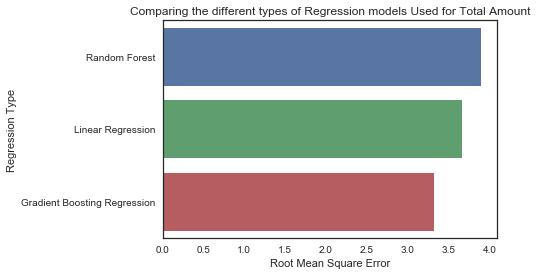

In [263]:
import seaborn as sns
sns.barplot(regression["rmse"], regression["regression"])
plt.xlabel("Root Mean Square Error")
plt.ylabel("Regression Type")
plt.title("Comparing the different types of Regression models Used for Total Amount")

In [264]:
#This concludes our work.